In [3]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error,r2_score

In [10]:
 df = pd.read_csv(r'C:\Users\HP\Downloads\laptop_prices.csv')
 df.head()



,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [12]:
 df.isnull().sum()
 df = df.dropna()


In [14]:
print(df.columns.tolist())


['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [15]:
df = pd.get_dummies(df, columns=['Company', 'CPU_company', 'GPU_company'], drop_first=True)


In [26]:
print(df.dtypes)


Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_model                object
Company_Apple              bool
Company_Asus               bool
Company_Chuwi              bool
Company_Dell               bool
Company_Fujitsu            bool
Company_Google             bool
Company_HP                 bool
Company_Huawei             bool
Company_LG                 bool
Company_Lenovo             bool
Company_MSI                bool
Company_

In [19]:
X = df.drop('Price_euros', axis=1) 
y = df['Price_euros']
 

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

In [45]:
df_encoded = pd.get_dummies(df)


In [47]:
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.7472773968275706
RMSE: 354.16966778189135


In [52]:
 y_pred = model.predict(X_test)

In [53]:
 mse = mean_squared_error(y_test, y_pred)
 print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
 print(f"R-squared: {r2}")

Mean Squared Error: 125436.1535767353
R-squared: 0.7472773968275706


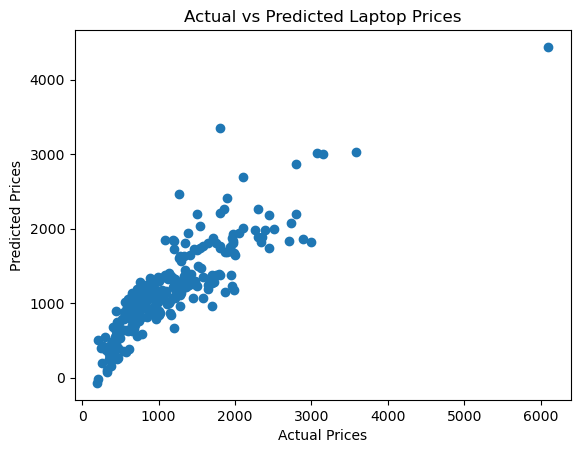

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()